# Лабораторная работа №4


## Исследование моделей размещения пользователей и распространения сигнала

### Цель:


1. Исследование сценарий размещения пользователей на плоскости и расчет
   вероятностей блокировок прямой видимости.
   Задание. Построить согласно описанному ниже алгоритму имитационную модель,
   позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнить
   полученную характеристику с результатами математической модели.
1. В квадратной области со стороной А согласно точечному Пуассоновскому
   процессу с плотностью q разместить объекты (окружности с фиксированным
   радиусом r), которые могут заблокировать линию прямой видимости между двумя
   точками, размещенными на расстоянии x друг от друга внутри обозначенной
   области. Проверить блокирует ли хотя бы один объект линию прямой видимости.
1. Количество блокирующих объектов определяется согласно распределению
   Пуассона с параметром qA2
   , а объекты вбрасываются независимо друг от друга.
   При этом центры блокирующих объектов должны быть распределены равномерно
   внутри рассматриваемой области.
   На основе описанного выше алгоритма получить 1000 реализаций факта блокировки
   линии прямой видимости и рассчитать вероятность блокировки линии прямой
   видимости в поле блокирующих объектов. Полученный результат сравнить с
   результатами математической модели


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

In [34]:
A = 10
q = 0.3
radius_block = 0.5
dist = 3
list_point = np.array

In [35]:
def plot_circle(x, y, r):
    angels = np.linspace(0, 2*np.pi, 50)
    cirX = x+r*np.cos(angels)
    cirY = y+r*np.sin(angels)
    plt.plot(cirX, cirY, "r")

In [36]:
def poisson_points(l, area):
    num_block = np.random.poisson(l*area**2)
    x = np.random.uniform(0, area, size=num_block)
    y = np.random.uniform(0, area, size=num_block)
    return x, y

In [37]:
def create_rect(x1, y1, x2, y2, angl):
    diff_angl = 2*np.pi - angl
    reverse_angl = np.pi/2 - diff_angl
    opp_angl = reverse_angl + np.pi
    xA = x1 + radius_block * np.cos(opp_angl)
    yA = y1 + radius_block * np.sin(opp_angl)
    xB = x1 + radius_block * np.cos(reverse_angl)
    yB = y1 + radius_block * np.sin(reverse_angl)
    xC = x2 + radius_block * np.cos(reverse_angl)
    yC = y2 + radius_block * np.sin(reverse_angl)
    xD = x2 + radius_block * np.cos(opp_angl)
    yD = y2 + radius_block * np.sin(opp_angl)

    return xA, yA, xB, yB, xC, yC, xD, yD

In [38]:
def check_dist(a, b, c):
    ca = (c-a) / norm(c-a)
    ba = (b-a) / norm(b-a)
    cb = (c-b) / norm(c-b)
    ab = (a-b) / norm(a-b)

    if np.arccos(np.dot(ca, ba)) > 1:
        return norm(c-a)
    if np.arccos(np.dot(cb, ab)) > 1:
        return norm(c-b)
    return norm(np.cross(a-b, a-c)) / norm(b-a)

In [39]:
def crossing():
    for i in range(len(x)):
        if (np.round(check_dist(np.array([x1, y1]), np.array([x2, y2]), np.array([x[i], y[i]])), 1) <= radius_block):
            return True

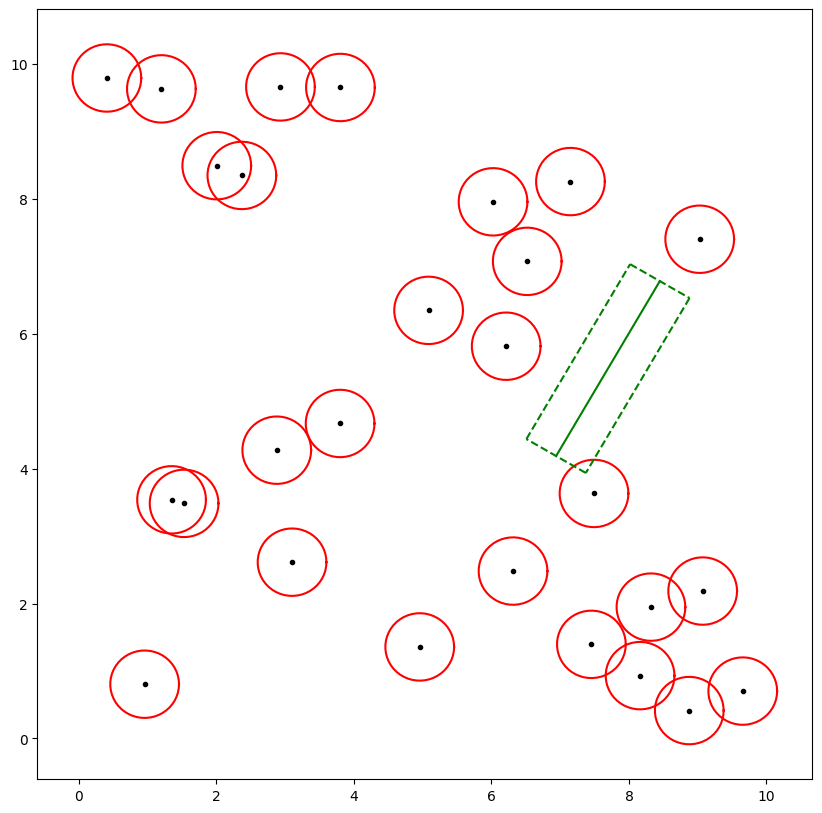

In [40]:
x,y = poisson_points(q, A)

angl = np.random.uniform(0, 2*np.pi)

# line coords
x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
x2 = x1 + dist * np.cos(angl)
y2 = y1 + dist * np.sin(angl)

# rect coords 
xA, yA, xB, yB, xC, yC, xD, yD = create_rect(x1,y1,x2,y2,angl)

plt.figure(figsize=(10,10))

# plot circles
plt.plot(x,y,".k")
for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)

# plot line
plt.plot([x1,x2], [y1,y2], "-g")

# plot rect
plt.plot([xA, xB], [yA, yB], "--g")
plt.plot([xB, xC], [yB, yC], "--g")
plt.plot([xC, xD], [yC, yD], "--g")
plt.plot([xD, xA], [yD, yA], "--g")


In [41]:
if crossing():
    print("Blocked")
else:
    print("Free")

Free


In [42]:

cnt = 0
for i in range(1000):
    # circle cents
    x,y = poisson_points(q, A)

    # line angel 
    angl = np.random.uniform(0, 2*np.pi)

    # line coords
    x1,y1 = np.random.uniform(0, A), np.random.uniform(0, A)
    x2 = x1 + dist * np.cos(angl)
    y2 = y1 + dist * np.sin(angl)
    
    if crossing():
        cnt += 1
print(cnt/1000)

0.62


In [43]:

S = 2 * radius_block * dist
l = q * S
prob = 1 - np.exp(-l)
print(prob)

0.5934303402594008
